In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import csv
import json
from pprint import pprint

from config import nom_api

In [3]:
crypto_df = pd.read_csv("../Resources/MattCrypto.csv")
sp500_df = pd.read_csv("../Resources/SP500.csv")
djia_df = pd.read_csv("../Resources/DJIA.csv")
usd_index_df = pd.read_csv("../Resources/usd_index.csv")

base_url = "https://api.nomics.com/v1/"
ticker = "btc"
coin_list =["BTC","ETH","LTC","BNB","BCH"]
coin_cap_list = ["BTC","ETH","USDT","XRP","BCH"]
currency_url = (f"{base_url}currencies/ticker?key={nom_api}&ids=BTC,ETH,LTC,BNB,BCH,XRP")



response = requests.get(currency_url,verify = False).json()
print(json.dumps(response,indent = 4, sort_keys = True))

btc_vol_1d = float(response[0]["1d"]["volume"])
btc_vol_365d = float(response[0]["365d"]["volume"])


print(f"BTC 1d Volume is: {btc_vol_1d}")
print(f"BTC 365d Volume is: {btc_vol_365d}")
print(f"BTC 1 year volume change is: {btc_vol_365d - btc_vol_1d}")
#print()

[
    {
        "1d": {
            "market_cap_change": "-721873260.62",
            "market_cap_change_pct": "-0.0028",
            "price_change": "-39.56587099",
            "price_change_pct": "-0.0029",
            "volume": "17303530974.74",
            "volume_change": "-5243199230.34",
            "volume_change_pct": "-0.2325"
        },
        "30d": {
            "market_cap_change": "59822551836.95",
            "market_cap_change_pct": "0.3052",
            "price_change": "3213.62318321",
            "price_change_pct": "0.3034",
            "volume": "575992651158.87",
            "volume_change": "-110098405359.57",
            "volume_change_pct": "-0.1605"
        },
        "365d": {
            "market_cap_change": "87581347934.17",
            "market_cap_change_pct": "0.5205",
            "price_change": "4471.58211481",
            "price_change_pct": "0.4790",
            "volume": "10789930552050.63",
            "volume_change": "6772283619967.05",
         

C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [5]:
vol=[]
price = []
volume = []
coin_id=[]
price_pct=[]

url = (f"{base_url}currencies/ticker?key={nom_api}&ids=")

for coins in coin_list:
    response = requests.get(url + coins, verify = False).json()
    coin_id.append(response[0]["currency"])
    price.append(response[0]["ytd"]["price_change"])
    vol.append(response[0]["ytd"]["volume"])
    price_pct.append(response[0]["ytd"]["price_change_pct"])
    #vol.append([response["1d"]["volume"]-response["365d"]["volume"]])
    
print(price)
print(coin_id)
print(vol)

C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  Inse

['6146.13354054', '248.16269498', '10.19016595', '13.50961803', '37.43842605']
['BTC', 'ETH', 'LTC', 'BNB', 'BCH']
['9455285256947.15', '4382864889195.94', '852083023543.54', '104926591414.88', '1029580998469.71']


C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [6]:
coin_df = pd.DataFrame({
    "Ticker": coin_id,
    "YTD Price Change": price,
    "YTD Price Change %": price_pct,
    "YTD Volume":vol
})
coin_df = coin_df.sort_values("Ticker")
coin_df


,Ticker,YTD Price Change,YTD Price Change %,YTD Volume
4,BCH,37.43842605,0.1620,1029580998469.71
3,BNB,13.50961803,0.9201,104926591414.88
0,BTC,6146.13354054,0.8024,9455285256947.15
1,ETH,248.16269498,1.7556,4382864889195.94
2,LTC,10.19016595,0.2251,852083023543.54


In [7]:
price_change = coin_df["YTD Price Change %"].astype('float')
x_axis = coin_df["Ticker"]

price_change.dtypes

dtype('float64')

Text(0, 0.5, '% Change')

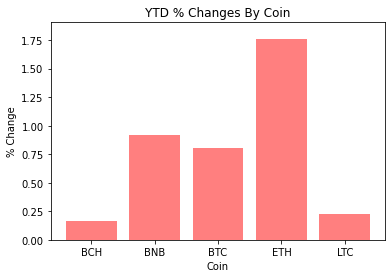

In [8]:
#Year % Change bar graph
plt.bar(x_axis, price_change, color = 'r', alpha = 0.5, align = 'center')

#plot y limit
plt.ylim(0,max(price_change)+0.15)

# chart title, x label, y label
plt.title("YTD % Changes By Coin")
plt.xlabel("Coin",)
plt.ylabel("% Change")


Text(0, 0.5, 'Price Change ($)')

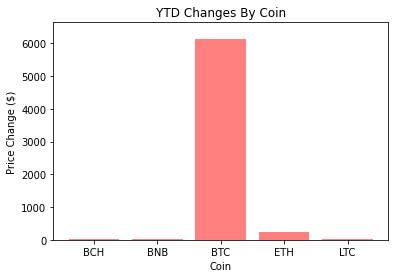

In [9]:
price_change_d = coin_df["YTD Price Change"].astype('float')
x_axis = coin_df["Ticker"]

#Year % Change bar graph
plt.bar(x_axis, price_change_d, color = 'r', alpha = 0.5, align = 'center')

#plot y Limit
plt.ylim(0,max(price_change_d)+500)

# chart title, x label, y label
plt.title("YTD Changes By Coin")
plt.xlabel("Coin",)
plt.ylabel("Price Change ($)")


In [10]:
#coin_df.plot("Ticker","YTD Price Change %", kind = 'bar')
crypto_df.head()

,Date,BTC Open,BTC High,BTC Low,BTC Close,BTC Adj Close,BTC Volume,ETH Open,ETH High,ETH Low,...,BCH Low,BCH Close,BCH Adj Close,BCH Volume,BNB Open,BNB High,BNB Low,BNB Close,BNB Adj Close,BNB Volume
0,11/1/2015,315.005005,495.562012,300.997009,377.321014,377.321014,2.177623e+09,0.920847,1.10642,0.725665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12/1/2015,377.414001,469.102997,349.464996,430.566986,430.566986,2.096250e+09,0.878316,1.04537,0.770488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2016,430.721008,462.933990,354.914001,368.766998,368.766998,1.990880e+09,0.933712,2.83699,0.929835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2/1/2016,369.350006,448.045990,367.957001,437.696991,437.696991,1.876239e+09,2.319690,6.64741,2.116310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3/1/2016,437.916992,439.653015,394.035004,416.729004,416.729004,2.332853e+09,6.319310,15.25710,6.308850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
clean_djia_df = djia_df[["Date","Close"]]
clean_djia_df.head()

,Date,Close
0,11/1/15,17719.91992
1,12/1/15,17425.02930
2,1/1/16,16466.30078
3,2/1/16,16516.50000
4,3/1/16,17685.08984


In [12]:
clean_sp500_df = sp500_df[["Date","Close"]]
stock_market_df = pd.merge(clean_sp500_df, clean_djia_df, on = "Date")
rename_stock = stock_market_df.rename(columns = {"Close_x":"SP500 Close",
                                                "Close_y":"DJIA Close"})

rename_stock

btc_df = crypto_df[["Date","BTC Close"]]
btc_df = btc_df[:-1]
#crypto_stock = pd.merge(btc_df, rename_stock, on = "Date")
btc_df.head()

,Date,BTC Close
0,11/1/2015,377.321014
1,12/1/2015,430.566986
2,1/1/2016,368.766998
3,2/1/2016,437.696991
4,3/1/2016,416.729004


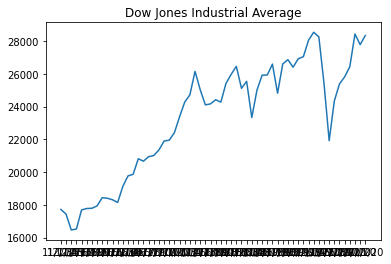

In [13]:
x_axis = rename_stock["Date"]
sp_price = rename_stock["SP500 Close"]
djia_price = rename_stock["DJIA Close"]
btc_price = btc_df["BTC Close"]
plt.plot(x_axis, djia_price)
plt.title("Dow Jones Industrial Average")
plt.show()

Text(0.5, 1.0, 'S&P 500')

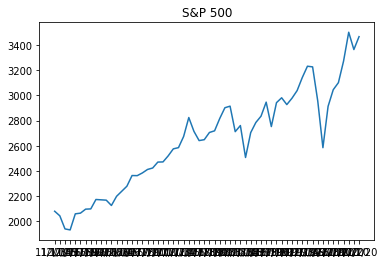

In [14]:
plt.plot(x_axis, sp_price)
plt.title("S&P 500")

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

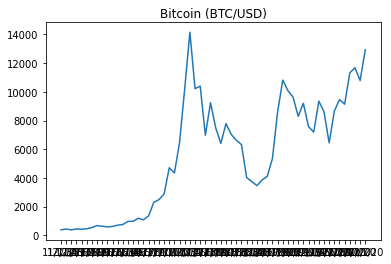

In [15]:
plt.plot(x_axis, btc_price)
plt.title("Bitcoin (BTC/USD)")
plt.xlabels(rotation = 75)
plt.show()

In [ ]:
usd_close = usd_index_df[["Date","Close"]]
usd_close.head()

usd_price = usd_close["Close"]
x_axis = usd_close["Date"]
plt.plot(x_axis,usd_price)
plt.title("USD Index Price")


In [16]:
btc_df = crypto_df[["Date","BTC Close"]]
btc_df = btc_df[:-1]
crypto_stock = pd.merge(btc_df, rename_stock, on = "Date")
btc_df.head()

,Date,BTC Close
0,11/1/2015,377.321014
1,12/1/2015,430.566986
2,1/1/2016,368.766998
3,2/1/2016,437.696991
4,3/1/2016,416.729004


In [17]:
top_cap_url = (f"{base_url}currencies/ticker?key={nom_api}&ids=BTC,ETH,USDT,XRP,BCH")
response = requests.get(top_cap_url,verify = False).json()
print(json.dumps(response,indent = 4, sort_keys = True))


C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


[
    {
        "1d": {
            "market_cap_change": "-741258201.57",
            "market_cap_change_pct": "-0.0029",
            "price_change": "-40.61192734",
            "price_change_pct": "-0.0029",
            "volume": "17303530974.74",
            "volume_change": "-5243199230.34",
            "volume_change_pct": "-0.2325"
        },
        "30d": {
            "market_cap_change": "59803166896.00",
            "market_cap_change_pct": "0.3051",
            "price_change": "3212.57712686",
            "price_change_pct": "0.3033",
            "volume": "575992651158.87",
            "volume_change": "-110098405359.57",
            "volume_change_pct": "-0.1605"
        },
        "365d": {
            "market_cap_change": "87561962993.22",
            "market_cap_change_pct": "0.5204",
            "price_change": "4470.53605846",
            "price_change_pct": "0.4789",
            "volume": "10789930552050.63",
            "volume_change": "6772283619967.05",
         

In [18]:
#coins by value 

rank=[]
market_cap=[]
coin_cap_id= []
market_cap_chng = []
mkt_cap_chng_pct = []


url = (f"{base_url}currencies/ticker?key={nom_api}&ids=")

for coins in coin_cap_list:
    response = requests.get(url + coins, verify = False).json()
    coin_cap_id.append(response[0]["currency"])
    market_cap_chng.append(response[0]["ytd"]["market_cap_change"])
    mkt_cap_chng_pct.append(response[0]["ytd"]["market_cap_change_pct"])
    rank.append(response[0]['rank'])
    market_cap.append(response[0]['market_cap'])
    
print(rank)
print(market_cap)
print(coin_cap_id)
print(market_cap_chng)
print(mkt_cap_chng_pct)


C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  Inse

['1', '2', '3', '4', '6']
['255829905749', '44111947523', '16674266289', '10852006107', '4984739930']
['BTC', 'ETH', 'USDT', 'XRP', 'BCH']
['116924947180.41', '28691381208.71', '12173521175.25', '2142391937.55', '778800814.15']
['0.8418', '1.8606', '2.7048', '0.2460', '0.1852']


C:\Users\Sarah Jr\anaconda3\envs\PythonData\lib\site-packages\urllib3\connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.nomics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [19]:
market_cap_rank = pd.DataFrame({"Ticker": coin_cap_id,
                               "Market Cap Rank": rank,
                               "Market Cap": market_cap,
                               "Market Cap Change": market_cap_chng,
                               "Market Cap % Change": mkt_cap_chng_pct})
market_cap_rank

,Ticker,Market Cap Rank,Market Cap,Market Cap Change,Market Cap % Change
0,BTC,1,255829905749,116924947180.41,0.8418
1,ETH,2,44111947523,28691381208.71,1.8606
2,USDT,3,16674266289,12173521175.25,2.7048
3,XRP,4,10852006107,2142391937.55,0.2460
4,BCH,6,4984739930,778800814.15,0.1852


Text(0, 0.5, 'Market Cap (Billions)')

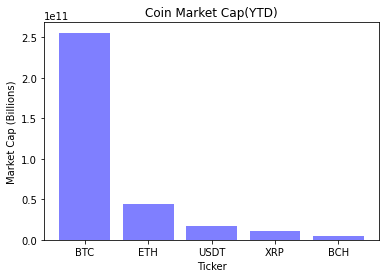

In [22]:
mcap = market_cap_rank["Market Cap"].astype('float')
ticker = market_cap_rank["Ticker"]

y_axis = mcap
x_axis = ticker

plt.bar(x_axis, y_axis, color='b', alpha = 0.5, align = 'center')
plt.title("Coin Market Cap(YTD)")
plt.xlabel("Ticker")
plt.ylabel("Market Cap (Billions)")


Text(0, 0.5, '% Change')

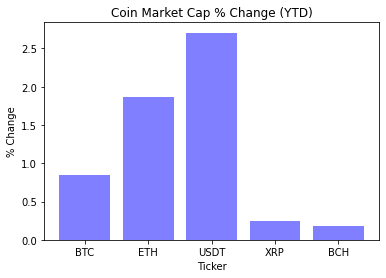

In [23]:
mcap_pct_chng = market_cap_rank["Market Cap % Change"].astype('float')
ticker = market_cap_rank["Ticker"]

y_axis = mcap_pct_chng
x_axis = ticker

plt.bar(x_axis, y_axis, color='b', alpha = 0.5, align = 'center')
plt.title("Coin Market Cap % Change (YTD)")
plt.xlabel("Ticker")
plt.ylabel("% Change")
